## CID22 - Introdução A Programação Para Ciência De Dados - L. Celso - 2021/01
## Trabalho: Definição de Dataset, Limpeza e Análise dos Dados
## Aluno: Rodolfo Stremel Zulai

### Dataset: SiGesGuarda 
- Base contendo os dados das ocorrências atendidas pela Guarda Municipal de Curitiba. 

### Importar bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

sns.set_theme(style = 'whitegrid', font_scale = 1.1)

Matplotlib is building the font cache; this may take a moment.


### Carregar arquivo .csv, ler as primeiras linhas, definir e filtrar os dados relevantes, analisar os tipos dos dados e quantidade de dados faltantes

In [2]:
df = pd.read_csv('2021-04-01_sigesguarda_-_Base_de_Dados.csv', sep=';', encoding='latin-1', skiprows=[1], low_memory=False)

In [3]:
print(f'O dataset original contém', df.shape[0],'linhas (ocorrências) e', df.shape[1],'colunas (características).')

O dataset original contém 339775 linhas (ocorrências) e 35 colunas (características).


In [4]:
df = df[['ATENDIMENTO_BAIRRO_NOME',
         'EQUIPAMENTO_URBANO_NOME',
         'LOGRADOURO_NOME',
         'NATUREZA1_DESCRICAO',
         'SUBCATEGORIA1_DESCRICAO',
         'OCORRENCIA_ANO',
         'OCORRENCIA_DIA_SEMANA',
         'OCORRENCIA_HORA',
         'OCORRENCIA_MES',
         'OPERACAO_DESCRICAO',
         'ORIGEM_CHAMADO_DESCRICAO',
         'SECRETARIA_NOME']]

In [5]:
df.head()

,ATENDIMENTO_BAIRRO_NOME,EQUIPAMENTO_URBANO_NOME,LOGRADOURO_NOME,NATUREZA1_DESCRICAO,SUBCATEGORIA1_DESCRICAO,OCORRENCIA_ANO,OCORRENCIA_DIA_SEMANA,OCORRENCIA_HORA,OCORRENCIA_MES,OPERACAO_DESCRICAO,ORIGEM_CHAMADO_DESCRICAO,SECRETARIA_NOME
0,CIDADE INDUSTRIAL,NaN,DAVI XAVIER DA SILVA,Alarmes,Disparo de Alarme (violação),2009,QUINTA,15:14:00,1,NaN,"NÃO CADASTRAR ""ANTIGO SIGA""",FUNDAÇÃO DE AÇÃO SOCIAL
1,FAZENDINHA,BOSQUE DA FAZENDINHA,CARLOS KLEMTZ,Roubo,Transeunte,2009,QUINTA,15:22:00,1,NaN,153,SECRETARIA MUNICIPAL MEIO AMBIENTE
2,UBERABA,NaN,DOUTOR JOÃO DE PAULA MOURA BRITO,Animais,Cão solto em via pública,2009,QUINTA,15:59:00,1,NaN,156,SECRETARIA MUNICIPAL DA SAÚDE
3,SÍTIO CERCADO,NaN,EDGARD CAVALCANTI DE ALBUQUERQUE,Animais,Cão solto em via pública,2009,QUINTA,16:13:00,1,NaN,156,SECRETARIA MUNICIPAL DA SAÚDE
4,TATUQUARA,CENTRO DE ESPORTE E LAZER SANTA RITA,CARLOS MUNHOZ DA ROCHA,Alarmes,Disparo de Alarme (violação),2009,QUINTA,16:29:00,1,NaN,"NÃO CADASTRAR ""ANTIGO SIGA""",FUNDAÇÃO DE AÇÃO SOCIAL


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339775 entries, 0 to 339774
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   ATENDIMENTO_BAIRRO_NOME   339630 non-null  object
 1   EQUIPAMENTO_URBANO_NOME   130443 non-null  object
 2   LOGRADOURO_NOME           339775 non-null  object
 3   NATUREZA1_DESCRICAO       339775 non-null  object
 4   SUBCATEGORIA1_DESCRICAO   225539 non-null  object
 5   OCORRENCIA_ANO            339775 non-null  int64 
 6   OCORRENCIA_DIA_SEMANA     339775 non-null  object
 7   OCORRENCIA_HORA           339775 non-null  object
 8   OCORRENCIA_MES            339775 non-null  int64 
 9   OPERACAO_DESCRICAO        227552 non-null  object
 10  ORIGEM_CHAMADO_DESCRICAO  339775 non-null  object
 11  SECRETARIA_NOME           339775 non-null  object
dtypes: int64(2), object(10)
memory usage: 31.1+ MB


In [7]:
df.isna().sum()

ATENDIMENTO_BAIRRO_NOME        145
EQUIPAMENTO_URBANO_NOME     209332
LOGRADOURO_NOME                  0
NATUREZA1_DESCRICAO              0
SUBCATEGORIA1_DESCRICAO     114236
OCORRENCIA_ANO                   0
OCORRENCIA_DIA_SEMANA            0
OCORRENCIA_HORA                  0
OCORRENCIA_MES                   0
OPERACAO_DESCRICAO          112223
ORIGEM_CHAMADO_DESCRICAO         0
SECRETARIA_NOME                  0
dtype: int64

### Excluir ou preencher dados faltantes, alterar tipos de dados errados

In [8]:
# Excluir linhas com valores null em ATENDIMENTO_BAIRRO_NOME
# Preencher valores null com NÃO em EQUIPAMENTO_URBANO_NOME
# Preencher valores null com NÃO em SUBCATEGORIA1_DESCRICAO
# Preencher valores null com NÃO em OPERACAO_DESCRICAO
# Alterar tipo de object para datetime e retornar somente a hora (como int) em OCORRENCIA_HORA

In [9]:
df = df.dropna(subset = ['ATENDIMENTO_BAIRRO_NOME'])

df.loc[:,'EQUIPAMENTO_URBANO_NOME'] = df.loc[:,'EQUIPAMENTO_URBANO_NOME'].fillna('NÃO')

df.loc[:,'SUBCATEGORIA1_DESCRICAO'] = df.loc[:,'SUBCATEGORIA1_DESCRICAO'].fillna('NÃO')

df.loc[:,'OPERACAO_DESCRICAO'] = df.loc[:,'OPERACAO_DESCRICAO'].fillna('NÃO')

df.loc[:,'OCORRENCIA_HORA'] = pd.to_datetime(df.loc[:,'OCORRENCIA_HORA']).dt.hour

In [10]:
print(f'O dataset limpo contém', df.shape[0],'linhas (ocorrências) e', df.shape[1],'colunas (características).')

O dataset limpo contém 339630 linhas (ocorrências) e 12 colunas (características).


### Análise exploratória e perguntas:
- A quantidade de ocorrências aumentou com os anos?
- Como é a distribuição de ocorrências por hora? E dia da semana? E mês?
- A renda da região afeta os tipos de ocorrência?
- Como é a distribuição do total de ocorrências por bairro sobre o total de moradores daquele bairro? 
- As ocorrências mais comuns mudaram ou continuam as mesmas desde 2009?
- Como 2021 se compara aos outros anos?
- Quais as ocorrências mais comuns nos dez bairros com mais ocorrências?

In [11]:
df.head().T

,0,1,2,3,4
ATENDIMENTO_BAIRRO_NOME,CIDADE INDUSTRIAL,FAZENDINHA,UBERABA,SÍTIO CERCADO,TATUQUARA
EQUIPAMENTO_URBANO_NOME,NÃO,BOSQUE DA FAZENDINHA,NÃO,NÃO,CENTRO DE ESPORTE E LAZER SANTA RITA
LOGRADOURO_NOME,DAVI XAVIER DA SILVA,CARLOS KLEMTZ,DOUTOR JOÃO DE PAULA MOURA BRITO,EDGARD CAVALCANTI DE ALBUQUERQUE,CARLOS MUNHOZ DA ROCHA
NATUREZA1_DESCRICAO,Alarmes,Roubo,Animais,Animais,Alarmes
SUBCATEGORIA1_DESCRICAO,Disparo de Alarme (violação),Transeunte,Cão solto em via pública,Cão solto em via pública,Disparo de Alarme (violação)
OCORRENCIA_ANO,2009,2009,2009,2009,2009
OCORRENCIA_DIA_SEMANA,QUINTA,QUINTA,QUINTA,QUINTA,QUINTA
OCORRENCIA_HORA,15,15,15,16,16
OCORRENCIA_MES,1,1,1,1,1
OPERACAO_DESCRICAO,NÃO,NÃO,NÃO,NÃO,NÃO


In [12]:
df.describe()

,OCORRENCIA_ANO,OCORRENCIA_HORA,OCORRENCIA_MES
count,339630.000000,339630.000000,339630.000000
mean,2015.529547,13.673088,6.352142
std,3.804480,6.371217,3.462219
min,2009.000000,0.000000,1.000000
25%,2012.000000,9.000000,3.000000
50%,2016.000000,15.000000,6.000000
75%,2019.000000,19.000000,9.000000
max,2021.000000,23.000000,12.000000


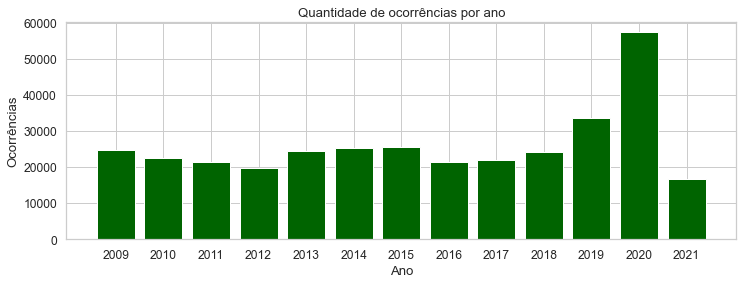

In [13]:
plt.figure(figsize=(12,4))

plt.bar(df['OCORRENCIA_ANO'].value_counts().sort_index().index,
        df['OCORRENCIA_ANO'].value_counts().sort_index().values, 
        color='darkgreen')
plt.title('Quantidade de ocorrências por ano')
plt.xlabel('Ano')
plt.xticks(df['OCORRENCIA_ANO'].value_counts().sort_index().index)
plt.ylabel('Ocorrências')

plt.savefig('anos', bbox_inches='tight');

- As ocorrências em 2020 quase dobraram em relação à 2019. Qual a justificativa? Qual tipo de ocorrência cresceu? Há alguma relação com as reclamações de COVID-19?

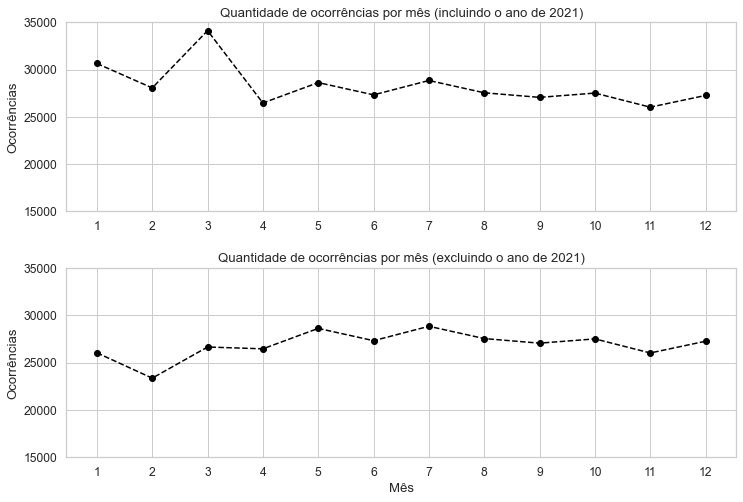

In [14]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(hspace=0.3)

plt.subplot(2,1,1)
plt.plot(df['OCORRENCIA_MES'].value_counts().sort_index().index,
        df['OCORRENCIA_MES'].value_counts().sort_index().values, 
        "o--",
        color='black')
plt.title('Quantidade de ocorrências por mês (incluindo o ano de 2021)')
plt.xticks(df['OCORRENCIA_MES'].value_counts().sort_index().index)
plt.ylabel('Ocorrências')
plt.ylim([15000,35000])

plt.subplot(2,1,2)
plt.plot(df[df['OCORRENCIA_ANO'] != 2021]['OCORRENCIA_MES'].value_counts().sort_index().index,
        df[df['OCORRENCIA_ANO'] != 2021]['OCORRENCIA_MES'].value_counts().sort_index().values, 
        "o--",
        color='black')
plt.title('Quantidade de ocorrências por mês (excluindo o ano de 2021)')
plt.xlabel('Mês')
plt.xticks(df['OCORRENCIA_MES'].value_counts().sort_index().index)
plt.ylabel('Ocorrências')
plt.ylim([15000,35000])

plt.savefig('meses', bbox_inches='tight');

- As ocorrências em março aparentam ser muito mais frequentes do que nos outros meses. Quais são os principais chamados desse mês? Março sempre teve essa alta frequência ou esse aumento ocorre em algum ano em específico?

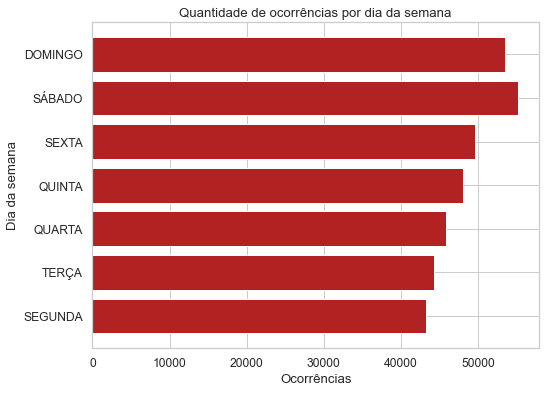

In [15]:
plt.figure(figsize=(8,6))
plt.barh(df['OCORRENCIA_DIA_SEMANA'].value_counts().reindex(['SEGUNDA','TERÇA','QUARTA','QUINTA','SEXTA','SÁBADO','DOMINGO']).index,
        df['OCORRENCIA_DIA_SEMANA'].value_counts().reindex(['SEGUNDA','TERÇA','QUARTA','QUINTA','SEXTA','SÁBADO','DOMINGO']).values,
        color='firebrick')
plt.title('Quantidade de ocorrências por dia da semana')
plt.ylabel('Dia da semana')
plt.yticks(['SEGUNDA','TERÇA','QUARTA','QUINTA','SEXTA','SÁBADO','DOMINGO'])
plt.xlabel('Ocorrências')

plt.savefig('dias_da_semana', bbox_inches='tight');

- A frequência das ocorrências cresce de segunda-feira até sábado e tem uma leve queda no domingo, porém é visível que no fim de semana há mais chamados.
- Quais são as ocorrências mais comuns no final de semana? E durante a semana?

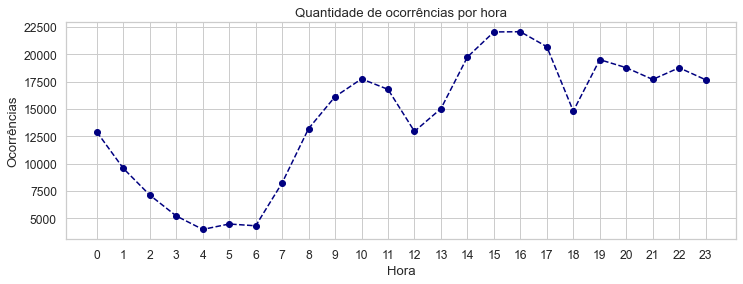

In [16]:
plt.figure(figsize=(12,4))
plt.plot(df['OCORRENCIA_HORA'].value_counts().sort_index().index,
         df['OCORRENCIA_HORA'].value_counts().sort_index().values, 
         "o--",
         color='navy')
plt.title('Quantidade de ocorrências por hora')
plt.xlabel('Hora')
plt.xticks(df['OCORRENCIA_HORA'].value_counts().sort_index().index)
plt.ylabel('Ocorrências')

plt.savefig('horas', bbox_inches='tight');

- A maioria dos fatos ocorre durante a tarde até o início da madrugada, com uma queda no período das 18h (pode existir uma relação com o fato de esse ser o horário de saída do trabalho de muitas pessoas) e, em seguida, de manhã, enquanto a madrugada é mais tranquila.

In [17]:
df.head()

,ATENDIMENTO_BAIRRO_NOME,EQUIPAMENTO_URBANO_NOME,LOGRADOURO_NOME,NATUREZA1_DESCRICAO,SUBCATEGORIA1_DESCRICAO,OCORRENCIA_ANO,OCORRENCIA_DIA_SEMANA,OCORRENCIA_HORA,OCORRENCIA_MES,OPERACAO_DESCRICAO,ORIGEM_CHAMADO_DESCRICAO,SECRETARIA_NOME
0,CIDADE INDUSTRIAL,NÃO,DAVI XAVIER DA SILVA,Alarmes,Disparo de Alarme (violação),2009,QUINTA,15,1,NÃO,"NÃO CADASTRAR ""ANTIGO SIGA""",FUNDAÇÃO DE AÇÃO SOCIAL
1,FAZENDINHA,BOSQUE DA FAZENDINHA,CARLOS KLEMTZ,Roubo,Transeunte,2009,QUINTA,15,1,NÃO,153,SECRETARIA MUNICIPAL MEIO AMBIENTE
2,UBERABA,NÃO,DOUTOR JOÃO DE PAULA MOURA BRITO,Animais,Cão solto em via pública,2009,QUINTA,15,1,NÃO,156,SECRETARIA MUNICIPAL DA SAÚDE
3,SÍTIO CERCADO,NÃO,EDGARD CAVALCANTI DE ALBUQUERQUE,Animais,Cão solto em via pública,2009,QUINTA,16,1,NÃO,156,SECRETARIA MUNICIPAL DA SAÚDE
4,TATUQUARA,CENTRO DE ESPORTE E LAZER SANTA RITA,CARLOS MUNHOZ DA ROCHA,Alarmes,Disparo de Alarme (violação),2009,QUINTA,16,1,NÃO,"NÃO CADASTRAR ""ANTIGO SIGA""",FUNDAÇÃO DE AÇÃO SOCIAL


In [18]:
# Criação de um dataset contando quantas ocorrências aconteceram por ano em cada bairro

df_bairros_total = df.pivot_table(index='ATENDIMENTO_BAIRRO_NOME', columns='OCORRENCIA_ANO', aggfunc='size')

df_bairros_total['total'] = df_bairros_total.sum(axis=1)

df_bairros_total = df_bairros_total.sort_values(by='total', ascending=False).reset_index().rename_axis(None, axis=1)

In [19]:
df_bairros_total.head()

,ATENDIMENTO_BAIRRO_NOME,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,total
0,CENTRO,2639.0,2597.0,3836.0,3373.0,3841.0,3922.0,3885.0,2798.0,3509.0,4026.0,9801.0,10614.0,2270.0,57111.0
1,CIDADE INDUSTRIAL,2075.0,1862.0,1534.0,1135.0,1379.0,1749.0,1865.0,1366.0,1498.0,1724.0,1607.0,3686.0,1359.0,22839.0
2,SÍTIO CERCADO,1612.0,1556.0,1498.0,1214.0,1325.0,1471.0,1473.0,1491.0,1431.0,1451.0,1602.0,4431.0,1022.0,21577.0
3,CAJURU,1404.0,1216.0,968.0,843.0,1129.0,1176.0,1243.0,1158.0,1151.0,1288.0,1656.0,2541.0,699.0,16472.0
4,BOQUEIRÃO,1248.0,942.0,1100.0,939.0,1006.0,1010.0,1028.0,1122.0,1210.0,1115.0,1282.0,2546.0,794.0,15342.0


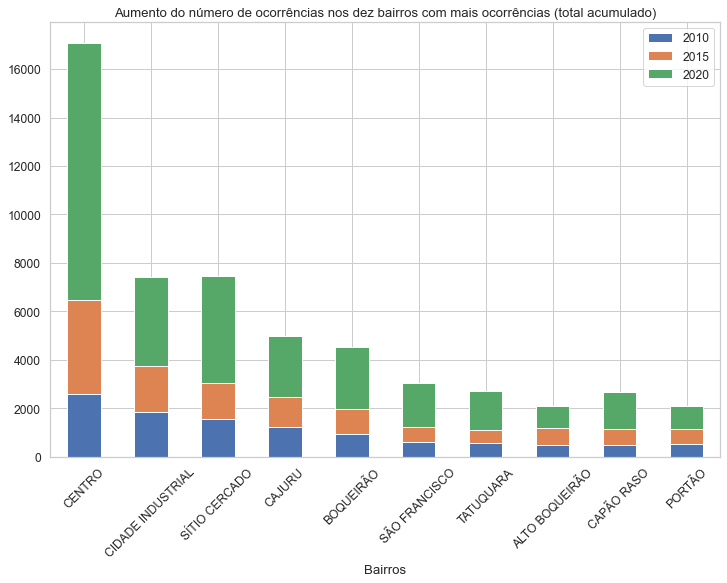

In [20]:
df_bairros_total.head(10).set_index('ATENDIMENTO_BAIRRO_NOME')[[2010, 2015, 2020]].plot(kind='bar', 
                                                                                        stacked=True, 
                                                                                        figsize=(12,8))
plt.title('Aumento do número de ocorrências nos dez bairros com mais ocorrências (total acumulado)')
plt.xticks(rotation=45)
plt.xlabel('Bairros')

plt.savefig('bairro_ocorr', bbox_inches='tight');

- O Centro, bairro com o maior número acumulado de fatos, teve quase três vezes mais ocorrências em 2020 em relação a 2015. A quais fatos esse crescimento se deve? O crescimento nos outros bairros se justifica pelo mesmo motivo?

In [21]:
# Criação de um dataset contando quantas ocorrências aconteceram por ano para cada natureza de ocorrência

df_ocorr_total = df.pivot_table(index='NATUREZA1_DESCRICAO', columns='OCORRENCIA_ANO', aggfunc='size')

df_ocorr_total['total'] = df_ocorr_total.sum(axis=1)

df_ocorr_total = df_ocorr_total.sort_values(by='total', ascending=False).rename_axis(None, axis=1)

In [22]:
df_ocorr_total.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,total
NATUREZA1_DESCRICAO,,,,,,,,,,,,,,
Apoio,2397.0,2644.0,2656.0,2708.0,3166.0,3772.0,3570.0,3790.0,4360.0,4739.0,6672.0,8454.0,2273.0,51201.0
Dano,3094.0,2701.0,3118.0,3447.0,4681.0,3972.0,3602.0,2479.0,2227.0,2073.0,1961.0,1557.0,403.0,35315.0
Atitude Suspeita (Abordagem),433.0,678.0,867.0,746.0,831.0,1162.0,1463.0,1589.0,2176.0,2375.0,7010.0,9356.0,1815.0,30501.0
Orientação,120.0,100.0,151.0,131.0,109.0,132.0,154.0,219.0,151.0,200.0,606.0,13501.0,5327.0,20901.0
Perturbação do sossego,5481.0,4638.0,983.0,973.0,1092.0,1562.0,1327.0,891.0,794.0,678.0,616.0,899.0,230.0,20164.0


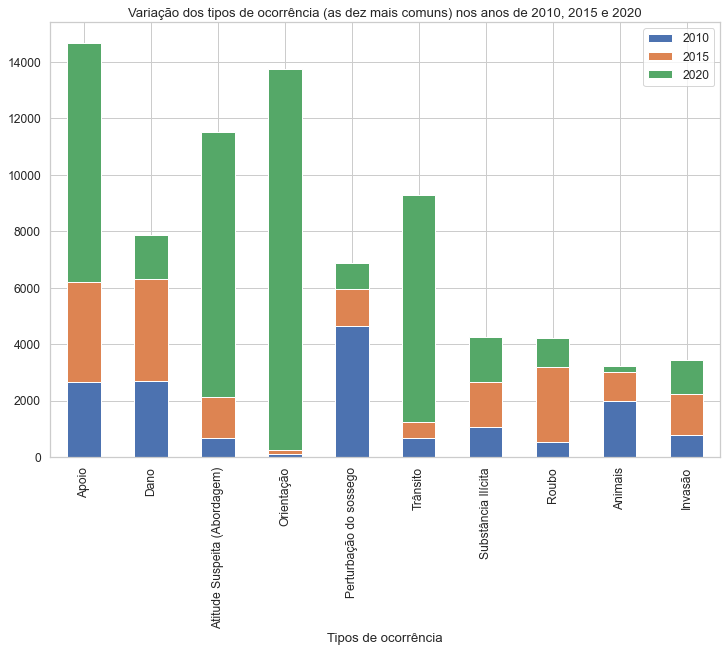

In [23]:
df_ocorr_total.head(10)[[2010, 2015, 2020]].plot(kind='bar',stacked=True, figsize=(12,8))
plt.title('Variação dos tipos de ocorrência (as dez mais comuns) nos anos de 2010, 2015 e 2020')
plt.xlabel('Tipos de ocorrência')

plt.savefig('ocorr_anos', bbox_inches='tight');

- O que justifica o aumento do número de ocorrências de Orientação? E de Apoio, Atituide Suspeita e Trânsito?
- E a queda de reclamações de Dano, Perturbação de Sossego e Roubo?

In [24]:
# Criação de um dataset contando quantas ocorrências aconteceram por bairro para cada natureza de ocorrência

df_ocorr_bairro = df.pivot_table(columns='ATENDIMENTO_BAIRRO_NOME', index='NATUREZA1_DESCRICAO', aggfunc='size')

df_ocorr_bairro['total'] = df_ocorr_bairro.sum(axis=1)

df_ocorr_bairro = df_ocorr_bairro.sort_values(by='total', ascending=False).rename_axis(None, axis=1)

In [25]:
# Filtrando o dataset criado pelos dez bairro com a maior quantidade de ocorrências

df_ocorr_bairro[list(df_bairros_total.head(10)['ATENDIMENTO_BAIRRO_NOME'].values)].head(10)

,CENTRO,CIDADE INDUSTRIAL,SÍTIO CERCADO,CAJURU,BOQUEIRÃO,SÃO FRANCISCO,TATUQUARA,ALTO BOQUEIRÃO,CAPÃO RASO,PORTÃO
NATUREZA1_DESCRICAO,,,,,,,,,,
Apoio,9872.0,3007.0,2654.0,2503.0,2429.0,1079.0,1199.0,1135.0,1314.0,959.0
Dano,4538.0,2667.0,2276.0,1797.0,1404.0,1113.0,882.0,910.0,757.0,949.0
Atitude Suspeita (Abordagem),12094.0,1479.0,1404.0,849.0,1262.0,2025.0,333.0,599.0,434.0,339.0
Orientação,2290.0,1628.0,2645.0,877.0,1058.0,541.0,610.0,306.0,375.0,344.0
Perturbação do sossego,898.0,1472.0,1304.0,630.0,624.0,1138.0,395.0,454.0,346.0,284.0
Trânsito,1235.0,1531.0,1211.0,876.0,785.0,225.0,390.0,341.0,1001.0,518.0
Substância Ilícita,6327.0,804.0,1008.0,324.0,436.0,2051.0,153.0,297.0,164.0,458.0
Roubo,3441.0,596.0,1343.0,825.0,968.0,278.0,111.0,570.0,462.0,473.0
Animais,231.0,1113.0,865.0,782.0,731.0,48.0,398.0,484.0,277.0,224.0


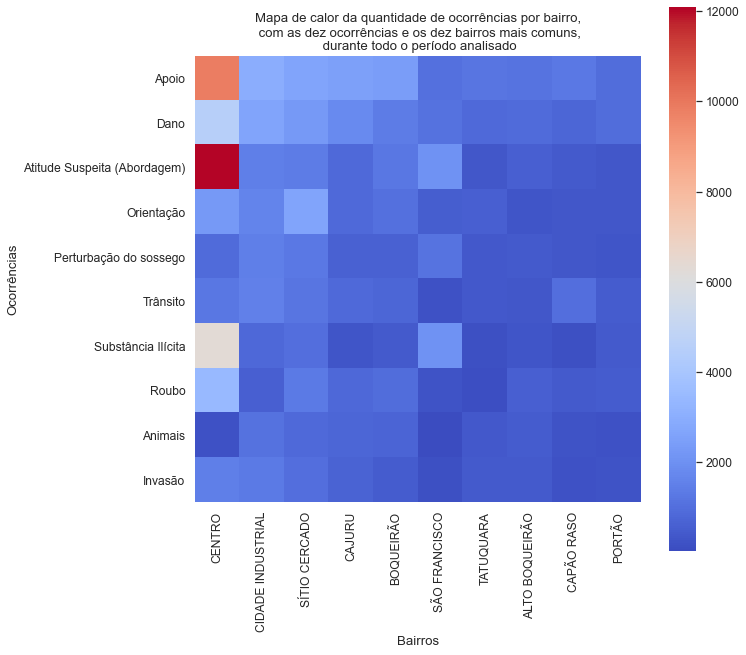

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(df_ocorr_bairro[list(df_bairros_total.head(10)['ATENDIMENTO_BAIRRO_NOME'].values)].head(10),
            cmap='coolwarm', square=True)
plt.title('Mapa de calor da quantidade de ocorrências por bairro,\n com as dez ocorrências e os dez bairros mais comuns,\n durante todo o período analisado')
plt.xlabel('Bairros')
plt.ylabel('Ocorrências')

plt.savefig('heatmap_ocorr_bairro', bbox_inches='tight');

- No Centro, as ocorrências de Atitude Suspeita são as mais comuns, seguidas de Apoio e Substância Ilícita.
- Nos outros bairros, Apoio é o acontecimento mais frequente.
- Essas frequências se repetiram em 2020 com a pandemia da COVID-19 ou houve uma mudança?

### Orientação = COVID-19? Isso justifica o aumento significativo de ocorrências em 2020?

In [27]:
# Criação de um dataset contendo todas as ocorrências que contenham a palavra "COVID" na coluna de Subcategoria

df_covid = df[df['SUBCATEGORIA1_DESCRICAO'].str.contains("COVID")]

In [28]:
df_covid.head()

,ATENDIMENTO_BAIRRO_NOME,EQUIPAMENTO_URBANO_NOME,LOGRADOURO_NOME,NATUREZA1_DESCRICAO,SUBCATEGORIA1_DESCRICAO,OCORRENCIA_ANO,OCORRENCIA_DIA_SEMANA,OCORRENCIA_HORA,OCORRENCIA_MES,OPERACAO_DESCRICAO,ORIGEM_CHAMADO_DESCRICAO,SECRETARIA_NOME
281615,BOQUEIRÃO,NÃO,MARECHAL FLORIANO PEIXOTO,Orientação,ORIENTAÇÃO COVID-19,2020,TERÇA,7,5,EVENTOS,153,SECRETARIA MUNICIPAL DE DEFESA SOCIAL E TRANSITO
281621,CAJURU,TERMINAL CENTENÁRIO,FILIPINAS,Orientação,ORIENTAÇÃO COVID-19,2020,TERÇA,8,5,EVENTOS,IMEDIATA,URBANIZAÇÃO DE CURITIBA
281624,CAPÃO DA IMBUIA,NÃO,DELEGADO LEOPOLDO BELCZAK,Orientação,ORIENTAÇÃO COVID-19,2020,TERÇA,8,5,NORMAL,IMEDIATA,SECRETARIA MUNICIPAL DE DEFESA SOCIAL E TRANSITO
281627,PORTÃO,MUSEU MUNICIPAL DE ARTE,REPÚBLICA ARGENTINA,Orientação,ORIENTAÇÃO COVID-19,2020,TERÇA,8,5,EVENTOS,IMEDIATA,SECRETARIA MUNICIPAL DE DEFESA SOCIAL E TRANSITO
281630,ÁGUA VERDE,NÃO,DO JAPÃO,Orientação,ORIENTAÇÃO COVID-19,2020,TERÇA,9,5,EVENTOS,"VAZIO ""NÃO CADASTRAR"" ANTIGO AOS GMS",SECRETARIA MUNICIPAL DE DEFESA SOCIAL E TRANSITO


In [29]:
print(f'O dataset original apresenta', len(df[df['NATUREZA1_DESCRICAO'] == 'Orientação']),'ocorrências com descrição "Orientação".')
print(f'O dataset que contém "COVID" como subcategoria apresenta', len(df_covid),'ocorrências descritas como "Orientação".')
print(f'Logo,', round(len(df_covid)/len(df[df['NATUREZA1_DESCRICAO'] == 'Orientação'])*100, 2),'% das ocorrências de natureza "Orientação" são sobre COVID-19.')

O dataset original apresenta 20901 ocorrências com descrição "Orientação".
O dataset que contém "COVID" como subcategoria apresenta 16598 ocorrências descritas como "Orientação".
Logo, 79.41 % das ocorrências de natureza "Orientação" são sobre COVID-19.


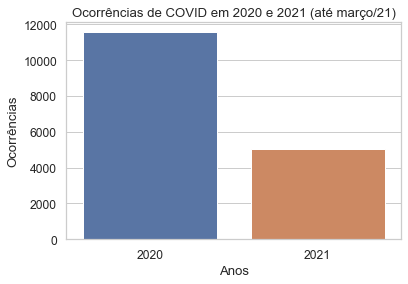

In [30]:
sns.countplot(data=df_covid, x='OCORRENCIA_ANO')
plt.xlabel('Anos')
plt.ylabel('Ocorrências')
plt.title('Ocorrências de COVID em 2020 e 2021 (até março/21)')

plt.savefig('covid_20_21', bbox_inches='tight');

- Apesar desse dataset conter dados coletados até o mês de março de 2021, as ocorrências relacionadas à COVID em 2021 já somam quase metade daquelas de 2020.

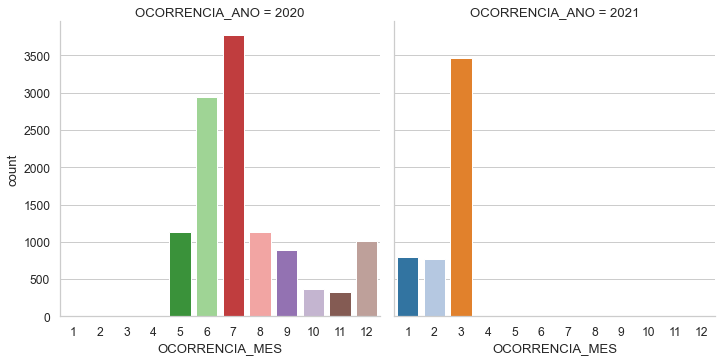

In [31]:
sns.catplot(data=df_covid, x="OCORRENCIA_MES", col="OCORRENCIA_ANO", kind="count", palette='tab20')

plt.savefig('covid_meses', bbox_inches='tight');

- As ocorrências sobre COVID de março de 2021 foram quase tantas quanto as de julho de 2020.

### Agrupamento de bairros por similaridade de ocorrências

In [32]:
# Criação de um crosstab com a quantidade de natureza de ocorrências por cada bairro

df_simil_bairros = pd.crosstab(index = df['ATENDIMENTO_BAIRRO_NOME'], columns = df['NATUREZA1_DESCRICAO'])

df_simil_bairros.head()

NATUREZA1_DESCRICAO,AIFU,Abalo Sísmico,Abandono de função,Abandono de incapaz,Abuso de incapazes,Achado,Acidente Viatura,Afogamento,Agressão física/verbal,Alagamento,...,Vias de fato,Vilipêndio a cadáver,Violação de Medida Protetiva Lei Maria da Penha,Violação de sepultura/túmulo,Violência arbitrária,Vistoria,ZELADORIA URBANA,Óbito,Óbito (Defesa Civil),Órgãos acionados
ATENDIMENTO_BAIRRO_NOME,,,,,,,,,,,,,,,,,,,,,
ABRANCHES,3,0,0,1,0,2,1,0,32,18,...,8,0,35,0,0,16,0,0,0,0
AGUAS BELAS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AHÚ,4,0,0,2,0,4,0,0,5,4,...,3,0,13,0,0,6,0,0,0,0
ALTO BOQUEIRÃO,19,0,1,7,1,31,0,1,118,64,...,49,0,69,1,0,64,0,4,1,0
ALTO DA GLÓRIA,9,0,0,2,0,0,0,0,30,4,...,28,0,5,0,0,7,0,2,0,0


In [33]:
# Normalização do crosstab

df_simil_norm = pd.DataFrame(MinMaxScaler().fit_transform(df_simil_bairros), 
                             index = df_simil_bairros.index, 
                             columns = df_simil_bairros.columns)

df_simil_norm.head()

NATUREZA1_DESCRICAO,AIFU,Abalo Sísmico,Abandono de função,Abandono de incapaz,Abuso de incapazes,Achado,Acidente Viatura,Afogamento,Agressão física/verbal,Alagamento,...,Vias de fato,Vilipêndio a cadáver,Violação de Medida Protetiva Lei Maria da Penha,Violação de sepultura/túmulo,Violência arbitrária,Vistoria,ZELADORIA URBANA,Óbito,Óbito (Defesa Civil),Órgãos acionados
ATENDIMENTO_BAIRRO_NOME,,,,,,,,,,,,,,,,,,,,,
ABRANCHES,0.027523,0.0,0.0,0.066667,0.0,0.016529,0.25,0.000,0.029412,0.056604,...,0.007561,0.0,0.099715,0.0,0.0,0.056738,0.0,0.000000,0.0,0.0
AGUAS BELAS,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00,0.000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
AHÚ,0.036697,0.0,0.0,0.133333,0.0,0.033058,0.00,0.000,0.004596,0.012579,...,0.002836,0.0,0.037037,0.0,0.0,0.021277,0.0,0.000000,0.0,0.0
ALTO BOQUEIRÃO,0.174312,0.0,1.0,0.466667,0.1,0.256198,0.00,0.125,0.108456,0.201258,...,0.046314,0.0,0.196581,0.2,0.0,0.226950,0.0,0.210526,1.0,0.0
ALTO DA GLÓRIA,0.082569,0.0,0.0,0.133333,0.0,0.000000,0.00,0.000,0.027574,0.012579,...,0.026465,0.0,0.014245,0.0,0.0,0.024823,0.0,0.105263,0.0,0.0


In [34]:
# Aplicação do modelo KMeans sobre os dados normalizados

kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(df_simil_norm)

KMeans(n_clusters=6, random_state=42)

In [35]:
kmeans.labels_

array([0, 0, 0, 4, 0, 0, 4, 0, 4, 4, 0, 0, 0, 0, 4, 0, 4, 4, 0, 2, 0, 0,
       0, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 3, 0, 4, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0,
       0, 4, 0, 0, 4, 0, 0, 0, 4, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 4, 0, 4, 0])

In [36]:
df_kmeans = pd.DataFrame(kmeans.labels_, index = df_simil_norm.index, columns = ['KMeans'])
df_kmeans

,KMeans
ATENDIMENTO_BAIRRO_NOME,
ABRANCHES,0
AGUAS BELAS,0
AHÚ,0
ALTO BOQUEIRÃO,4
ALTO DA GLÓRIA,0
...,...
VISTA ALEGRE,0
XAXIM,4
fanny,0


In [100]:
# Quantidade de bairros por agrupamento
df_kmeans.reset_index().groupby('KMeans')['ATENDIMENTO_BAIRRO_NOME'].size()

KMeans
0    134
1      2
2      1
3      1
4     25
5      1
Name: ATENDIMENTO_BAIRRO_NOME, dtype: int64

In [85]:
# Bairros em cada um dos agrupamentos
for k in sorted(df_kmeans['KMeans'].unique()):
    print('>>>>>>>>>> Agrupamento:', k,'<<<<<<<<<<')
    print(df_kmeans[df_kmeans['KMeans'] == k].reset_index()['ATENDIMENTO_BAIRRO_NOME'])
    print('\n')

>>>>>>>>>> Agrupamento: 0 <<<<<<<<<<
0                 ABRANCHES
1               AGUAS BELAS
2                       AHÚ
3            ALTO DA GLÓRIA
4            ALTO DA RUA XV
               ...         
129    VILA MARIA ANTONIETA
130           VILA PERNETA 
131            VISTA ALEGRE
132                   fanny
133             ÁGUAS BELAS
Name: ATENDIMENTO_BAIRRO_NOME, Length: 134, dtype: object


>>>>>>>>>> Agrupamento: 1 <<<<<<<<<<
0               CAJURU
1    CIDADE INDUSTRIAL
Name: ATENDIMENTO_BAIRRO_NOME, dtype: object


>>>>>>>>>> Agrupamento: 2 <<<<<<<<<<
0    BOQUEIRÃO
Name: ATENDIMENTO_BAIRRO_NOME, dtype: object


>>>>>>>>>> Agrupamento: 3 <<<<<<<<<<
0    CENTRO
Name: ATENDIMENTO_BAIRRO_NOME, dtype: object


>>>>>>>>>> Agrupamento: 4 <<<<<<<<<<
0       ALTO BOQUEIRÃO
1                ATUBA
2            BACACHERI
3          BAIRRO ALTO
4          BARREIRINHA
5           BIGORRILHO
6            BOA VISTA
7       CAMPO COMPRIDO
8           CAPÃO RASO
9        CENTRO CÍVICO
10 

In [38]:
# Fazendo join da coluna de agrupamentos com o dataframe original

df = df.join(df_kmeans, on='ATENDIMENTO_BAIRRO_NOME')

### Comparando médias de horários das ocorrências no Centro com os próximos quatro bairros com mais ocorrências

In [39]:
# Os cinco bairros com mais ocorrências

df_bairros_total['ATENDIMENTO_BAIRRO_NOME'].head(5).values

array(['CENTRO', 'CIDADE INDUSTRIAL', 'SÍTIO CERCADO', 'CAJURU',
       'BOQUEIRÃO'], dtype=object)

In [40]:
# Criação de um dataframe para cada bairro

df_centro = df[df['ATENDIMENTO_BAIRRO_NOME'] == 'CENTRO']
df_cic = df[df['ATENDIMENTO_BAIRRO_NOME'] == 'CIDADE INDUSTRIAL']
df_sit_cer = df[df['ATENDIMENTO_BAIRRO_NOME'] == 'SÍTIO CERCADO']
df_cajuru = df[df['ATENDIMENTO_BAIRRO_NOME'] == 'CAJURU']
df_boqueirao = df[df['ATENDIMENTO_BAIRRO_NOME'] == 'BOQUEIRÃO']

In [41]:
# Aplicação da função CompareMeans para média de ocorrências por horários

import statsmodels.stats.api as sms

cm = sms.CompareMeans(sms.DescrStatsW(df_centro['OCORRENCIA_HORA']), 
                      sms.DescrStatsW(df_cic['OCORRENCIA_HORA']))
print("Centro e CIC \n", cm.summary(), "\n\n")

cm = sms.CompareMeans(sms.DescrStatsW(df_centro['OCORRENCIA_HORA']), 
                      sms.DescrStatsW(df_sit_cer['OCORRENCIA_HORA']))
print("Centro e Sítio Cercado \n", cm.summary(), "\n\n")

cm = sms.CompareMeans(sms.DescrStatsW(df_centro['OCORRENCIA_HORA']), 
                      sms.DescrStatsW(df_cajuru['OCORRENCIA_HORA']))
print("Centro e Cajuru \n", cm.summary(), "\n\n")

cm = sms.CompareMeans(sms.DescrStatsW(df_centro['OCORRENCIA_HORA']), 
                      sms.DescrStatsW(df_boqueirao['OCORRENCIA_HORA']))
print("Centro e Boqueirão \n", cm.summary(), "\n\n")

Centro e CIC 
                           Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1     -0.5493      0.048    -11.411      0.000      -0.644      -0.455


Centro e Sítio Cercado 
                           Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1     -0.8216      0.049    -16.805      0.000      -0.917      -0.726


Centro e Cajuru 
                           Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1     -0.8631      0.053    -16.195      0.000      -0.968   

- Pela análise de comparação de médias, o Centro tem uma média de horário menor que os outros quatro próximos bairros com mais ocorrências.